In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load and prepare the data
df = pd.read_csv('car data.csv')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (301, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
# Data preprocessing
# Create label encoder object
le = LabelEncoder()

# Encode categorical variables
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Car_Name'] = le.fit_transform(df['Car_Name'])

# Select features for model
X = df[['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 
        'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Model Performance:
Root Mean Squared Error: 0.88
R-squared Score: 0.97


Text(0.5, 0, 'Importance Score')

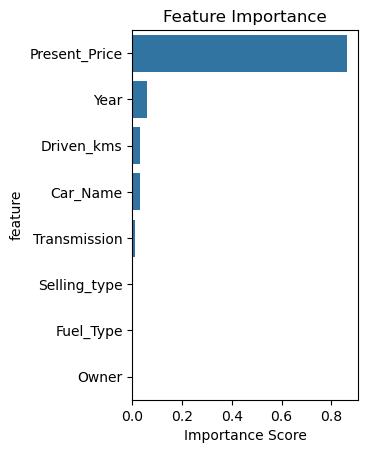

In [20]:
plt.subplot(1, 2, 1)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')

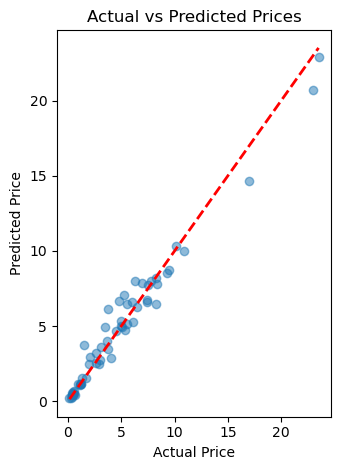

In [22]:
# Actual vs Predicted plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

plt.tight_layout()
plt.show()


In [24]:
def predict_price(car_name, year, present_price, driven_kms, fuel_type, selling_type, transmission, owner):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'Car_Name': [car_name],
        'Year': [year],
        'Present_Price': [present_price],
        'Driven_kms': [driven_kms],
        'Fuel_Type': [fuel_type],
        'Selling_type': [selling_type],
        'Transmission': [transmission],
        'Owner': [owner]
    })
    
    # Make prediction
    predicted_price = rf_model.predict(input_data)
    return predicted_price[0]

In [26]:
# Example usage of the prediction function
example_prediction = predict_price(
    car_name=le.transform(['swift'])[0],  # Encode the car name
    year=2015,
    present_price=5.0,
    driven_kms=30000,
    fuel_type=0,  # 0 for Petrol
    selling_type=0,  # 0 for Dealer
    transmission=0,  # 0 for Manual
    owner=0
)

print(f"\nExample Prediction:")
print(f"Predicted Price for the example car: {example_prediction:.2f} lakhs")


Example Prediction:
Predicted Price for the example car: 3.40 lakhs
